## Load Packages

In [51]:
import pandas as pd
import matplotlib.pyplot as plt


## import data

In [52]:
df_SNP = pd.read_csv ("matrix_1kg.txt",sep='\t')
df_SNP

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# add a column for allele frequency
allele_freq=df_SNP.iloc[:,4:].sum(axis=1)/(2*len(df_SNP.iloc[1,4:]))
allele_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

In [54]:
#extract SNP with allele frequency between 0.05 and 0.95
roi_df=df_SNP[(allele_freq <=0.95)& (allele_freq>=0.05)]
roi_df
# Be careful to use the () before and after&

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,chr21,26683267,T,G,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,1,2,0,0,0,1,1,1,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,chr21,40748951,T,C,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,2
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
9975,chr21,43359202,C,T,2,1,0,1,0,1,...,1,2,2,2,2,1,2,2,2,2


## Check the maximum and minimum of allele frequency in the new dataframe

In [55]:
max(roi_df.iloc[:,4:].sum(axis=1)/(len(roi_df.iloc[1,4:])*2))

0.9466248037676609

In [56]:
min(roi_df.iloc[:,4:].sum(axis=1)/(len(roi_df.iloc[1,4:])*2))

0.05023547880690738

## Histogram of common frequency

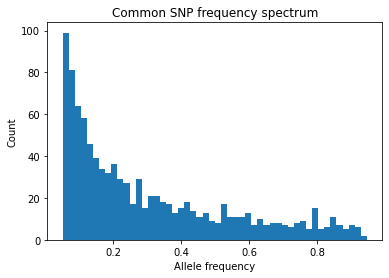

In [60]:
common_frequency=roi_df.iloc[:,4:].sum(axis=1)/(len(roi_df.iloc[1,4:])*2)
fig,axis = plt.subplots()
plt.hist(common_frequency,bins=50)
plt.title('Common SNP frequency spectrum')
plt.xlabel('Allele frequency')
plt.ylabel('Count')
plt.show()